In [1]:
%pip install pandas numpy statsmodels matplotlib seaborn


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./dataset.csv')
print("Shape: ", df.shape)
df.head(5)

Shape:  (4424, 35)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# dropping unecessary columns
df = df.drop(['Application order', 'Nacionality', 'International',
        'Inflation rate', 'GDP', 'Unemployment rate', 'Displaced'], axis=1)

In [5]:
# creating dataframe with only graduate and dropout students
df = df[df.Target != 'Enrolled']
# changing categroical values to numerical
# df['Target'] = pd.factorize(df['Target'])[0]

df.head(5)
# df.shape

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,8,2,1,1,13,10,6,10,0,...,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,1,6,11,1,1,1,3,4,4,0,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,1,1,5,1,1,22,27,10,10,0,...,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,1,8,15,1,1,23,27,6,4,0,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,2,12,3,0,1,22,28,10,10,0,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduate


In [6]:
df['Course'] = df['Course'].replace(1, 'Biofuel Production Technologies')
df['Course'] = df['Course'].replace(2, 'Animation and Multimedia Design')
df['Course'] = df['Course'].replace(3, 'Social Service (evening attendance)')
df['Course'] = df['Course'].replace(4, 'Agronomy')
df['Course'] = df['Course'].replace(5, 'Communication Design')
df['Course'] = df['Course'].replace(6, 'Veterinary Nursing')
df['Course'] = df['Course'].replace(7, 'Informatics Engineering')
df['Course'] = df['Course'].replace(8, 'Equiniculture')
df['Course'] = df['Course'].replace(9, 'Management')
df['Course'] = df['Course'].replace(10, 'Social Service')
df['Course'] = df['Course'].replace(11, 'Tourism')
df['Course'] = df['Course'].replace(12, 'Nursing')
df['Course'] = df['Course'].replace(13, 'Oral Hygiene')
df['Course'] = df['Course'].replace(14, 'Advertising and Marketing Management')
df['Course'] = df['Course'].replace(15, 'Journalism and Communication')
df['Course'] = df['Course'].replace(16, 'Basic Education')
df['Course'] = df['Course'].replace(17, 'Management (evening attendance)')

df['Gender'] = df['Gender'].replace(0, 'female')
df['Gender'] = df['Gender'].replace(1, 'male')

df['Tuition fees up to date'] = df['Tuition fees up to date'].replace(0, 'no')
df['Tuition fees up to date'] = df['Tuition fees up to date'].replace(1, 'yes')


Gender
female    2381
male      1249
Name: Gender, dtype: int64

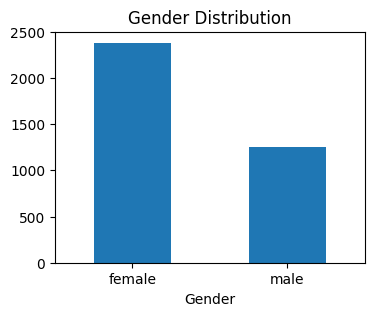

In [7]:
df2 = df.groupby(["Gender"])["Gender"].count()

df2.plot(kind="bar", rot=0, figsize=(4,3), title="Gender Distribution")
df2.head()


Course
Advertising and Marketing Management    220
Agronomy                                173
Animation and Multimedia Design         178
Basic Education                         142
Biofuel Production Technologies           9
Name: Course, dtype: int64

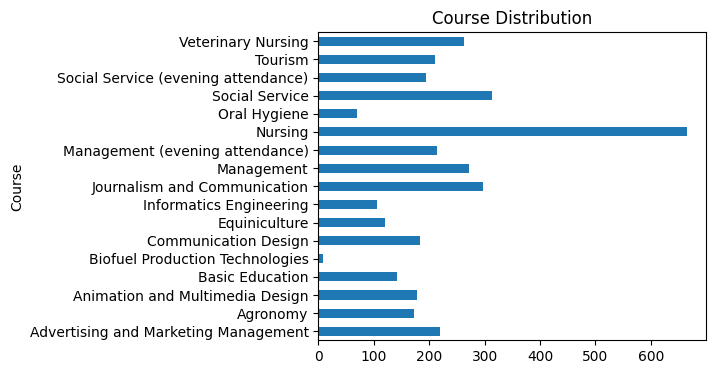

In [8]:
df2 = df.groupby(["Course"])["Course"].count()

df2.plot(kind="barh", rot=0, figsize=(5, 4), title="Course Distribution")
df2.head()


Target
Dropout     1421
Graduate    2209
Name: Target, dtype: int64

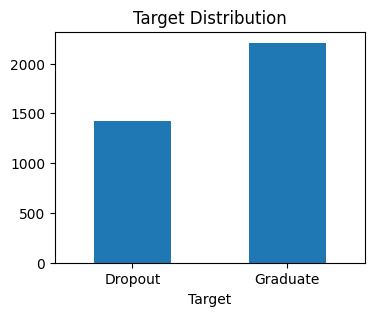

In [9]:
df2 = df.groupby(["Target"])["Target"].count()

df2.plot(kind="bar", rot=0, figsize=(4, 3), title="Target Distribution")
df2.head()

Target,Dropout,Graduate
Tuition fees up to date,,
no,457,29
yes,964,2180


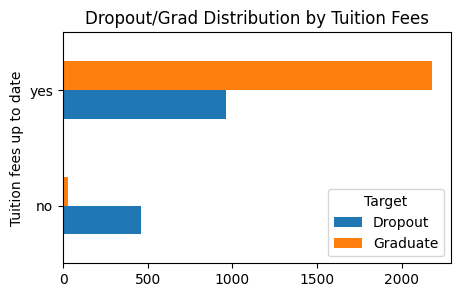

In [10]:
df2 = df.groupby(["Tuition fees up to date", "Target"])["Target"].count().unstack('Target')

df2.plot(kind='barh', rot=0, figsize=(5, 3), stacked=False,
         title="Dropout/Grad Distribution by Tuition Fees")
df2.head()

Target,Dropout,Graduate
Gender,,
female,720,1661
male,701,548


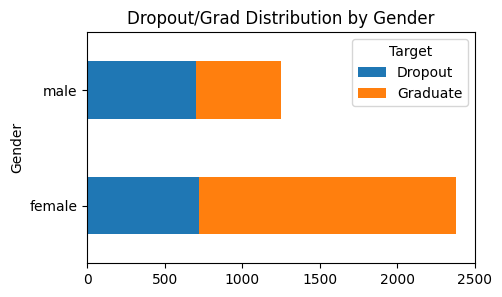

In [11]:
df2 = df.groupby(["Gender", "Target"])["Target"].count().unstack('Target')

df2.plot(kind='barh', rot=0, figsize=(5,3), stacked=True, title="Dropout/Grad Distribution by Gender")
df2.head()

<Axes: title={'center': 'Dropout/Grad Distribution by Course'}, ylabel='Course'>

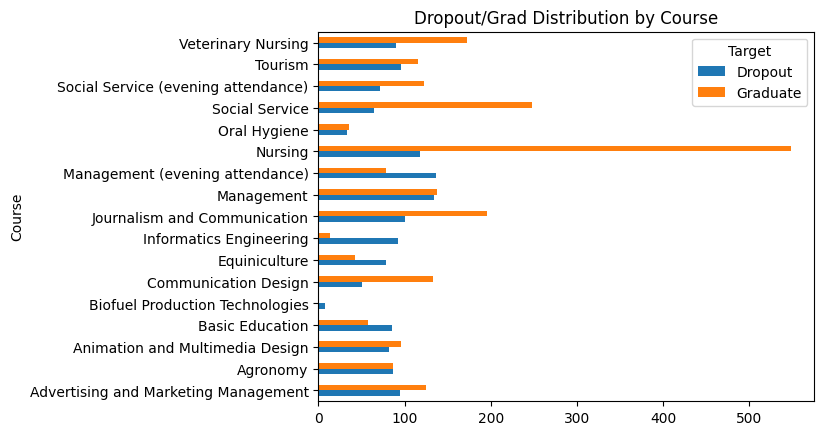

In [12]:
df2 = df.groupby(["Course", "Target"])["Target"].count().unstack('Target')

df2.plot(kind='barh', rot=0, stacked=False, title="Dropout/Grad Distribution by Course")

/var/folders/tg/t3qylscs4wl_v1vx1w0bpbzm0000gn/T/ipykernel_12049/2955970935.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby("Course")["Curricular units 2nd sem (grade)","Curricular units 1st sem (grade)"].mean()


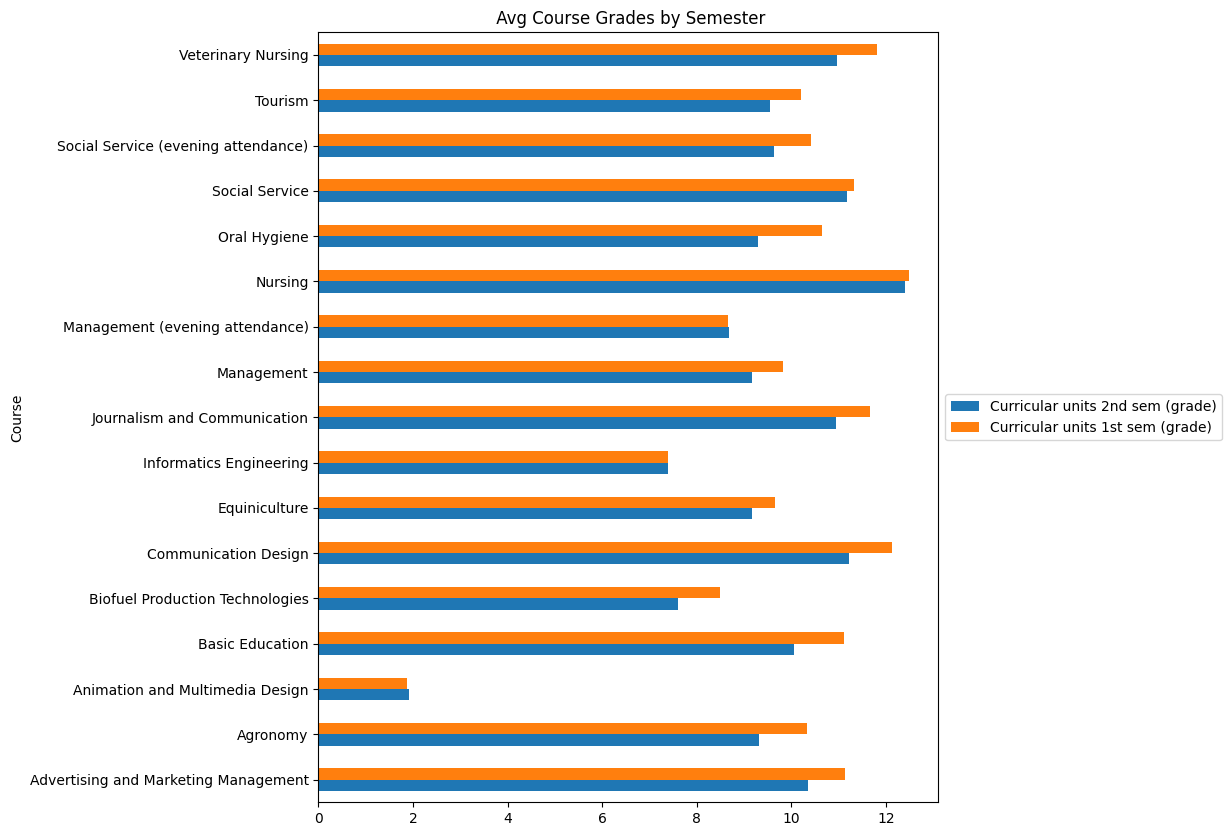

In [13]:
df2 = df[["Course",
          "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]]

df2 = df.groupby("Course")["Curricular units 2nd sem (grade)","Curricular units 1st sem (grade)"].mean()

df2.plot(kind='barh', rot=0, stacked=False, figsize=(8, 10), title=" Avg Course Grades by Semester").legend(loc='center left',bbox_to_anchor=(1.0, 0.5))